In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [3]:
np.random.seed(42)

# Simulate data
n_samples = 300

data = pd.DataFrame({
    "diet": np.random.choice(["vegan", "vegetarian", "omnivore"], n_samples),
    "transport": np.random.choice(["car", "bike", "public_transport", "walk"], n_samples),
    "electricity_kwh": np.random.normal(50, 15, n_samples).clip(min=10)
})

# Base CO2 footprint in kg/week
def calculate_co2(row):
    base = 0
    # Diet emission factors (example rough estimates)
    if row['diet'] == 'vegan': base += 20
    elif row['diet'] == 'vegetarian': base += 35
    else: base += 50
    
    # Transport emission factors
    if row['transport'] == 'car': base += 60
    elif row['transport'] == 'bike': base += 5
    elif row['transport'] == 'public_transport': base += 30
    else: base += 2

    # Electricity: 0.5 kg CO₂ per kWh (approx.)
    base += row['electricity_kwh'] * 0.5

    # Add some noise
    return base + np.random.normal(0, 5)

data["co2_kg_per_week"] = data.apply(calculate_co2, axis=1)


In [4]:
# Features and target
X = data.drop("co2_kg_per_week", axis=1)
y = data["co2_kg_per_week"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
categorical_cols = ["diet", "transport"]
numeric_cols = ["electricity_kwh"]

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(), categorical_cols),
    ("num", StandardScaler(), numeric_cols)
])

# Model
model = Pipeline([
    ("preprocess", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['diet', 'transport']),
                                                 ('num', StandardScaler(),
                                                  ['electricity_kwh'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [5]:
# Predict
y_pred = model.predict(X_test)

# MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Squared Error (MSE): 51.32


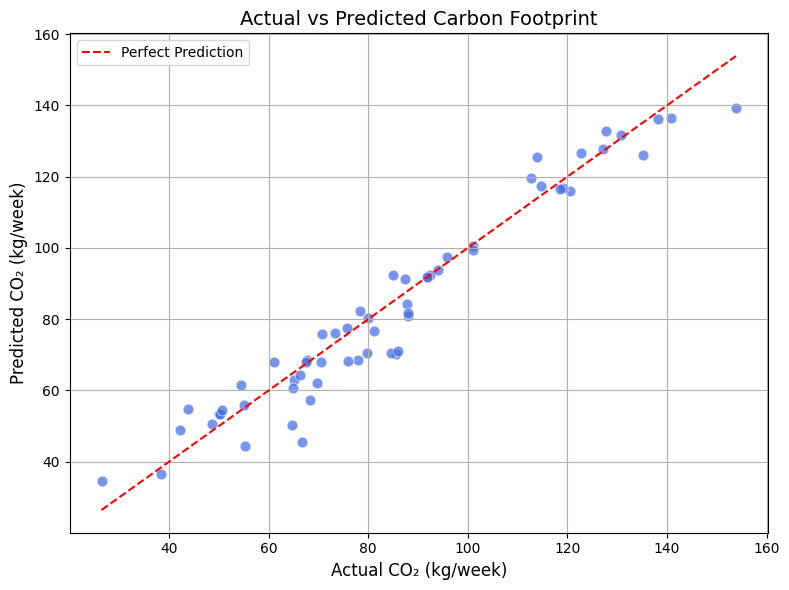

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, s=60, color='royalblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', label="Perfect Prediction")
plt.xlabel("Actual CO₂ (kg/week)", fontsize=12)
plt.ylabel("Predicted CO₂ (kg/week)", fontsize=12)
plt.title("Actual vs Predicted Carbon Footprint", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
